Variational AutoEncoder (VAE) with CelebA
===================================
---
Formation Introduction au Deep Learning  (FIDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 - Analyse our trained model
 - Load a saved model
 - Reconstruct some images
 - Latent space visualization
 - Matrix of generated images


## Step 1 - Setup environment
### 1.1 - Python stuff

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from skimage import io, transform
import os,sys,importlib
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm

import modules.vae
import modules.data_generator

reload(modules.data_generator)
reload(modules.vae)

from modules.vae  import VariationalAutoencoder
from modules.data_generator import DataGenerator

sys.path.append('..')
import fidle.pwk as ooo
importlib.reload(ooo)

ooo.init()

VariationalAutoencoder.about()
DataGenerator.about()


FIDLE 2020 - Practical Work Module
Version              : 0.2.8
Run time             : Wednesday 12 February 2020, 23:18:25
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf

FIDLE 2020 - Variational AutoEncoder (VAE)
TensorFlow version   : 2.0.0
VAE version          : 1.27

FIDLE 2020 - DataGenerator
Version              : 0.4


### 1.2 - The good place

In [2]:
place, dataset_dir = ooo.good_place( { 'GRICAD' : f'{os.getenv("SCRATCH_DIR","")}/PROJECTS/pr-fidle/datasets/celeba',
                                       'IDRIS'  : f'{os.getenv("WORK","")}/datasets/celeba'    } )

train_dir    = f'{dataset_dir}/clusters.train'
test_dir     = f'{dataset_dir}/clusters.test'

dataset_csv  = f'{dataset_dir}/list_attr_celeba.csv'
dataset_img  = f'{dataset_dir}/img_align_celeba'

Well, we should be at GRICAD !
We are going to use: /bettik/PROJECTS/pr-fidle/datasets/celeba


## Step 2 - Get data

In [61]:
x_test       = np.load(f'{train_dir}/images-000.npy')
dataset_desc = pd.read_csv(dataset_csv, header=0)

## Step 3 - Load best model

In [10]:
tag = 'CelebA.003'

vae=modules.vae.VariationalAutoencoder.load(tag, config='vae_config.json', weights='best_model.h5')

Model initialized.
Outputs will be in  : ./run/CelebA.003
Weights loaded from : ./run/CelebA.003/models/best_model.h5


## Step 4 - Image reconstruction

In [62]:
# ---- Choose few points

n_show = 8

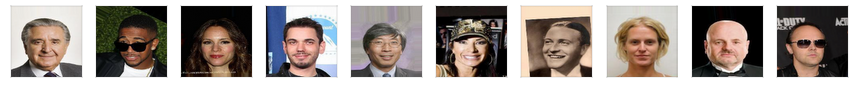

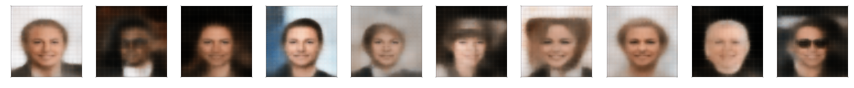

In [63]:
np.random.shuffle(x_test)

# ---- Get latent points and reconstructed images

z_test    = vae.encoder.predict(x_test)
x_reconst = vae.decoder.predict(z_test)

# ---- Just show it

ooo.plot_images(x_test[:10],    None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)
ooo.plot_images(x_reconst[:10], None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)


## Step 5 - Latent space

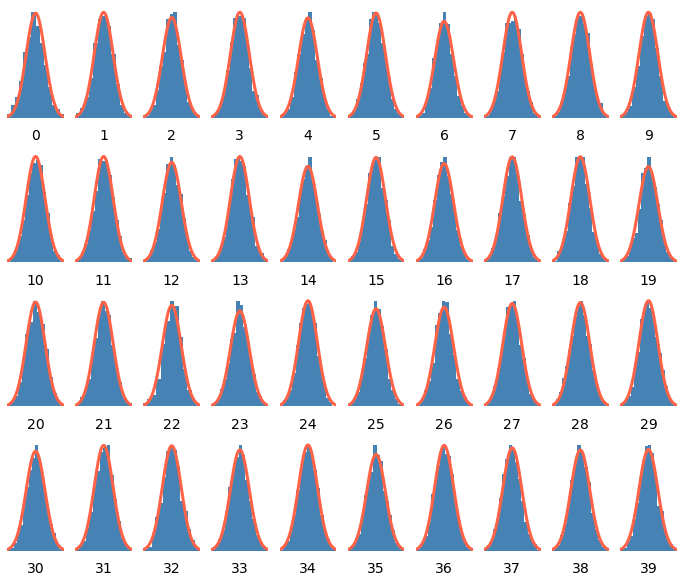

In [13]:
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_xlim(-3,3)
    ax.text(0.5, -0.2, str(i), fontsize=14, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

## Step 6 - Generating new faces

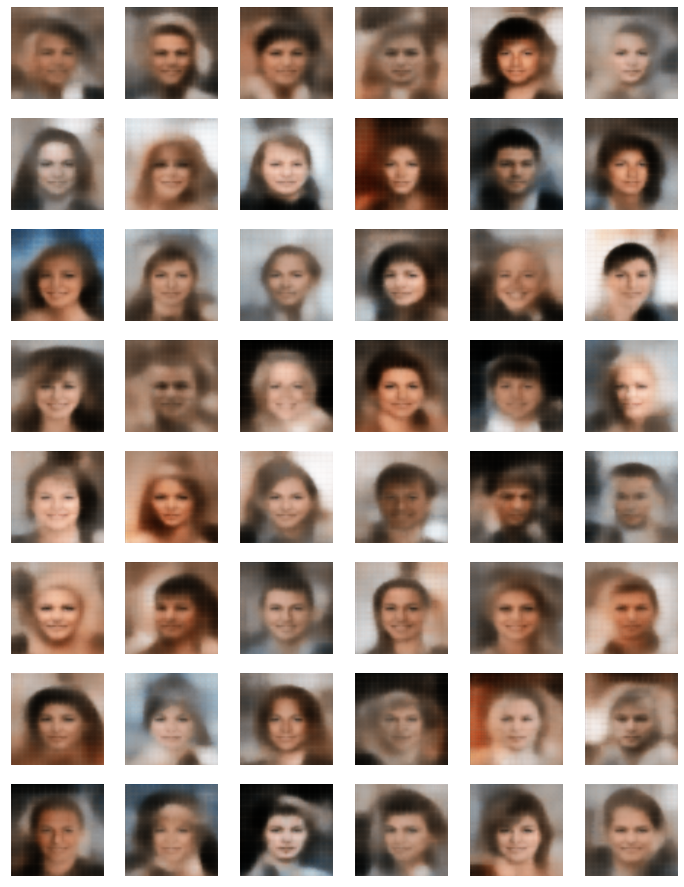

In [64]:
n_new = 48

z_new = np.random.normal( size=(n_new,vae.z_dim) )
x_new = vae.decoder.predict(z_new)

ooo.plot_images(x_new, None, columns=6, x_size=2,y_size=2, spines_alpha=0,y_padding=0)

## Step 7 - Latent space

In [65]:
display(dataset_desc.head())
for i,v in enumerate(dataset_desc.columns):
    print(f'{v:24}', end='')
    if (i+1) % 4 == 0 :print('')

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


image_id                5_o_Clock_Shadow        Arched_Eyebrows         Attractive              
Bags_Under_Eyes         Bald                    Bangs                   Big_Lips                
Big_Nose                Black_Hair              Blond_Hair              Blurry                  
Brown_Hair              Bushy_Eyebrows          Chubby                  Double_Chin             
Eyeglasses              Goatee                  Gray_Hair               Heavy_Makeup            
High_Cheekbones         Male                    Mouth_Slightly_Open     Mustache                
Narrow_Eyes             No_Beard                Oval_Face               Pale_Skin               
Pointy_Nose             Receding_Hairline       Rosy_Cheeks             Sideburns               
Smiling                 Straight_Hair           Wavy_Hair               Wearing_Earrings        
Wearing_Hat             Wearing_Lipstick        Wearing_Necklace        Wearing_Necktie         
Young                   

In [92]:
image_size=(128,128)

# ---- Shuffle
dataset_desc = dataset_desc.reindex(np.random.permutation(dataset_desc.index))

subset = dataset_desc.loc[ (dataset_desc['Mustache'] == 1)  & (dataset_desc['No_Beard']==-1)]
filenames=subset['image_id'][:200]

imgs=[]
for i,filename in enumerate(filenames):
    filename = f'{dataset_img}/{filename}'
    img = io.imread(filename)
    img = transform.resize(img, image_size)
    imgs.append( img )
    ooo.update_progress('Read :',len(imgs),len(filenames))

x_subset=np.array(imgs)
z_subset  = vae.encoder.predict(x_subset)


Read :           [########################################] 100.0% of 200


(20, 200)


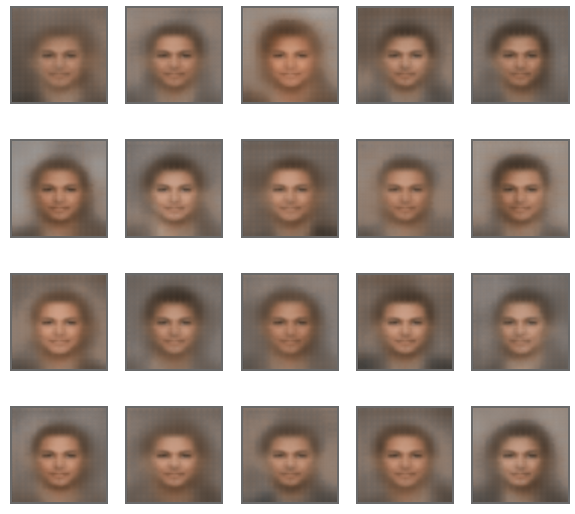

In [93]:
m=z_subset.mean(axis=0)

p=[]
for i in range(20):
    p.append(m+np.random.normal(.0,.2,200))
p=np.array(p)
print(p.shape)
x_reconst = vae.decoder.predict(p)
ooo.plot_images(x_reconst,columns=5,x_size=2,y_size=2)

In [52]:
raw_data = {'first_name': ['Jason', 'Molly', np.nan, np.nan, np.nan], 
        'nationality': ['USA', 'USA', 'France', 'UK', 'UK'], 
        'age': [42, 52, 36, 24, 70]}
df = pd.DataFrame(data=raw_data)
a=df['age']==42
a

0     True
1    False
2    False
3    False
4    False
Name: age, dtype: bool

----
That's all folks !